In [3]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import confusion_matrix

In [5]:
data = pd.read_csv("train.csv")

# Understanding the data

In [6]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [7]:
data.shape

(20800, 5)

# Missing Values

In [8]:
data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [9]:
# We have so many Null values ,so let's drop these Null Values
data = data.dropna()

# Checking for Imbalance Classes

<AxesSubplot:xlabel='label', ylabel='count'>

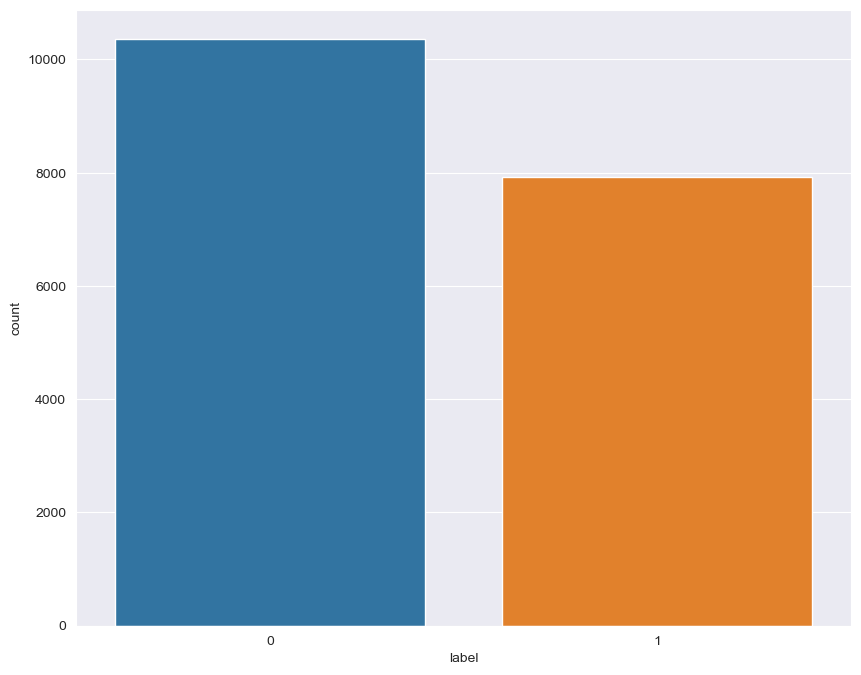

In [10]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,8))
sns.countplot(x='label',data=data)

# Model Creation

In [11]:
X = data.drop('label',axis=1)
y = data.label

In [12]:
print(X.shape,y.shape)

(18285, 4) (18285,)


In [13]:
# Now let's import Necessary libraries for LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM,Bidirectional
from tensorflow.keras.layers import Dense,Dropout

In [14]:
# Vocabulary Size
voc_size = 5000

In [15]:
messages = X.copy()
##Since we drop Null values from our Dataset ,so we need to Reset Index of our Dataset
messages.reset_index(inplace = True)

In [16]:
messages

,index,id,title,author,text
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...,...,...
18280,20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
18281,20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
18282,20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...
18283,20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [17]:
import nltk
import re
from nltk.corpus import stopwords

In [18]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10054]
[nltk_data]     An existing connection was forcibly closed by the
[nltk_data]     remote host>


False

Some important information:
re.sub()
1.Replace with regular expression 2.Replace multiple substrings with the same string 3.Replace using the matched part 4.Get the count of replaced parts 5.Here we are going to replace all regural expression which are not between a to z or A to Z with whitespace.

review.lower():
By this we are going to replace all the words in Lower case,So that all are treated as equally.

ps.stem()
Stemming is the process of producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers. A stemming algorithm reduces the words “chocolates”, “chocolatey”, “choco” to the root word, “chocolate” and “retrieval”, “retrieved”, “retrieves” reduce to the stem “retrieve”.

In [19]:
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

# One Hot Representation

In [20]:
one_hot_lbls = [one_hot(words,voc_size)for words in corpus]
one_hot_lbls

[[2605, 2198, 1791, 2734, 852, 1457, 2222, 2871, 611, 559],
 [488, 1371, 324, 1407, 3410, 2651, 4691],
 [711, 558, 2087, 728],
 [4275, 4488, 1736, 4481, 3438, 4067],
 [3359, 3410, 1808, 991, 475, 1768, 3410, 3661, 553, 3028],
 [4788,
  3409,
  2461,
  3165,
  734,
  657,
  1633,
  431,
  4010,
  524,
  3732,
  3079,
  3781,
  4809,
  4691],
 [695, 951, 1153, 724, 3629, 3417, 3514, 2832, 750, 160, 3173],
 [3478, 2512, 44, 1870, 3744, 4921, 657, 834, 750, 160, 3173],
 [3072, 1306, 2507, 3578, 2079, 2702, 3644, 3106, 657, 1932],
 [3901, 1718, 3687, 2027, 996, 1715, 3133, 3550],
 [478, 3038, 3045, 3950, 3413, 1490, 2568, 2455, 1599, 3152, 3743],
 [4481, 326, 852, 2702, 657, 3744],
 [570, 2753, 1391, 3294, 247, 3032, 1751, 1408, 2261],
 [4421, 3558, 4749, 1009, 2142, 4036, 2629, 750, 160, 3173],
 [4440, 869, 2759, 1278, 4271, 750, 160, 3173],
 [3917, 4033, 773, 3163, 1578, 4405, 3002, 4153, 1618, 4049],
 [2957, 4202, 1371],
 [3384, 55, 4033, 2664, 657, 1708, 3160, 4691],
 [253, 315, 324, 15

Embedding Representation
Pad_Sequences:
The pad_sequences() function in the Keras deep learning library can be used to pad variable length sequences. The default padding value is 0.0, which is suitable for most applications, although this can be changed by specifying the preferred value via the “value” argument. By this we are going to make all the sentances in same length.There are 2 types of Padding "Pre" and "Post",pre means it's going to add 0 in front and post means it's goint add 0 in back

In [21]:
Embedded_len = pad_sequences(one_hot_lbls,padding='pre',maxlen=20)
print(Embedded_len)

[[   0    0    0 ... 2871  611  559]
 [   0    0    0 ... 3410 2651 4691]
 [   0    0    0 ...  558 2087  728]
 ...
 [   0    0    0 ...  750  160 3173]
 [   0    0    0 ... 4114 1381 1257]
 [   0    0    0 ... 3492 2866 3172]]


In [22]:
## Creating model Using LSTM
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=20))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            200000    
                                                                 
 dropout (Dropout)           (None, 20, 40)            0         
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 256501 (1001.96 KB)
Trainable params: 256501 (1001.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


# Bidirectional-LSTM

In [35]:
## Creating model Using LSTM
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=20))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 20, 40)            200000    
                                                                 
 dropout_6 (Dropout)         (None, 20, 40)            0         
                                                                 
 bidirectional_2 (Bidirecti  (None, 200)               112800    
 onal)                                                           
                                                                 
 dropout_7 (Dropout)         (None, 200)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 201       
                                                                 
Total params: 313001 (1.19 MB)
Trainable params: 313001 (1.19 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [31]:
X_final = np.array(Embedded_len)
y_final = np.array(y)

In [36]:
X_final.shape,y_final.shape

((18285, 20), (18285,))

# Split the Data into Train and Test

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [38]:
model_fit =  model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
192/192 [==============================] - 12s 32ms/step - loss: 0.3010 - accuracy: 0.8616 - val_loss: 0.1976 - val_accuracy: 0.9180
Epoch 2/10
192/192 [==============================] - 4s 23ms/step - loss: 0.1486 - accuracy: 0.9426 - val_loss: 0.2069 - val_accuracy: 0.9191
Epoch 3/10
192/192 [==============================] - 4s 23ms/step - loss: 0.1101 - accuracy: 0.9572 - val_loss: 0.2325 - val_accuracy: 0.9148
Epoch 4/10
192/192 [==============================] - 4s 23ms/step - loss: 0.0856 - accuracy: 0.9682 - val_loss: 0.2821 - val_accuracy: 0.9133
Epoch 5/10
192/192 [==============================] - 4s 23ms/step - loss: 0.0689 - accuracy: 0.9759 - val_loss: 0.2913 - val_accuracy: 0.9127
Epoch 6/10
192/192 [==============================] - 4s 23ms/step - loss: 0.0585 - accuracy: 0.9790 - val_loss: 0.3117 - val_accuracy: 0.9120
Epoch 7/10
192/192 [==============================] - 4s 23ms/step - loss: 0.0505 - accuracy: 0.9838 - val_loss: 0.3835 - val_accuracy: 0.905

In [46]:
y_pred=model.predict(X_test)

189/189 [==============================] - 3s 7ms/step


# Performance Metrics


# The Model works best  with 92 % accuracy

In [49]:
def plot_learning_curve(model_fit,epochs):
    #Accuracy
    epoch_range = range(1,epochs+1)
    plt.plot(epoch_range,model_fit.history['accuracy'])
    plt.plot(epoch_range,model_fit.history["val_accuracy"])
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(["Train","Val"],loc ="upper left")
    plt.show()

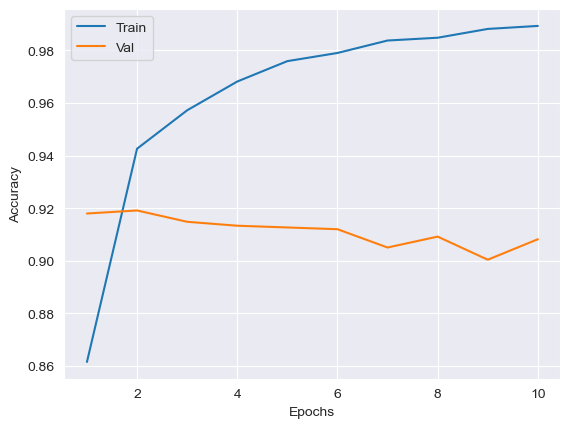

In [50]:
plot_learning_curve(model_fit,10)

In [54]:
def predict(text):
    corpus = []
    review = re.sub('[^a-zA-Z]', ' ', text)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
    print(corpus)
    one_hot_lbls = [one_hot(words,voc_size)for words in corpus]
    print(one_hot_lbls)
    Embedded_len = pad_sequences(one_hot_lbls,padding='pre',maxlen=20)
    print(Embedded_len)
    return model.predict(Embedded_len)

In [69]:
#if the value is less than 0.5 then it's  a Fake news else it's True
Text_input = messages.title[243]
predict(Text_input)

['al sharpton dem point appeal archi bunker trump voter breitbart']
[[1446, 2301, 2198, 4532, 2674, 1145, 1607, 657, 4846, 4691]]
[[   0    0    0    0    0    0    0    0    0    0 1446 2301 2198 4532
  2674 1145 1607  657 4846 4691]]
1/1 [==============================] - 0s 47ms/step


array([[0.00028372]], dtype=float32)